<h1> Data Description</h1>

- 활용 데이터 : 공공데이터(Boston Housing Data)
- 1978년 보스턴 주택 가격에 대한 데이터(506 X 14)

데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

독립 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

종속 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

분석에 필요한 라이브러리들을 임포트합니다
- 기계학습 분석에 필요한 라이브러리들은 하단에서 각각의 구성 함수가 사용될 때 임포트를 해서, 어떤 함수를 쓸 때 어떤 라이브러리를 불러와야하는지 익힐 예정입니다

In [557]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''

import scipy as sp
import scipy.stats as stats



from sklearn.metrics import mean_squared_error, r2, mean_absolute_error

'''

'\n\nimport scipy as sp\nimport scipy.stats as stats\n\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import ols\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, r2, mean_absolute_error\n\n'

데이터를 불러오고, 열어봅니다

In [559]:
boston = pd.read_csv('./house_price.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


데이터 정보도 확인해보구요

In [561]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


실습에서는 CAT.MEDV가 MEDV에서 파생된 칼럼이라고, 간단히 EDA 해보고 drop했는데, 여기서는 CAT.MEDV가 어떻게 파생된 것인지 한번 찾아볼게요(순수 재미용)


먼저 히트맵으로 상관계수를 확인해봅시다!

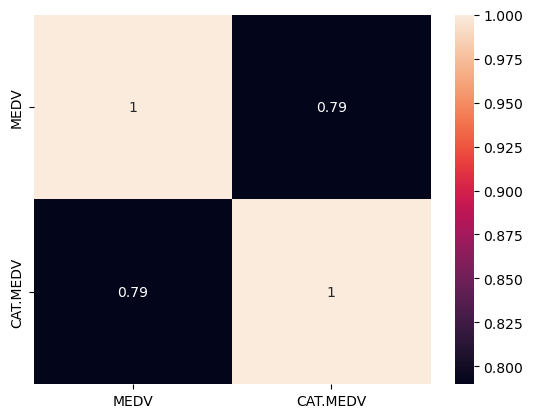

In [564]:
import seaborn as sns
sns.heatmap(boston[['MEDV', 'CAT.MEDV']].corr(),annot = True)
plt.show()

굉장히 높은 상관계수가 나타나는 부분을 알 수 있습니다

칼럼의 이름과 boston을 출력했을때 나타나는 값을 바탕으로 유추해봤을때, CAT.MEDV는 MEDV를 범주형으로 나눴을 가능성이 있습니다

정말로 그런지 value_counts()를 통해 확인해보겠습니다


In [566]:
boston['CAT.MEDV'].value_counts()

CAT.MEDV
0    422
1     84
Name: count, dtype: int64

확인 결과, 정말로 0과 1 두 가지 범주로 나뉜 자료임을 알 수 있어요

처음에 info()로 확인했다시피, MEDV 칼럼은 float형 자료였지요

아마도 float 자료형을 특정 기준으로 pd.cut() 등으로 잘라서 나눴을 것으로 보이네요

그래서 그 컷 기준을 보기 위해, MEDV와 CAT.MEDV을 슬라이싱하고, CAT.MEDV을 기준으로 그룹화한 뒤 MEDV의 통계치를 확인해볼게요

In [568]:
print(boston[['MEDV', 'CAT.MEDV']].groupby('CAT.MEDV').describe())

           MEDV                                                       
          count       mean       std   min    25%    50%     75%   max
CAT.MEDV                                                              
0         422.0  19.295261  5.287401   5.0  15.60  20.00  23.075  29.9
1          84.0  38.797619  7.199046  30.1  32.85  36.15  45.550  50.0


결과를 보니 CAT.MEDV이 0일때 최댓값이 29.9, CAT.MEDV이 1일때 최솟값이 30.1이네요

그럼 CAT.MEDV는 30을 기준으로 MEDV 값을 범주화한 칼럼인 것 같네요!

이제 궁금증은 해결됐고, 저한테는 해당 칼럼이 필요없으니 실습 자료처럼 지워버리겠습니다

In [570]:
boston.drop(labels="CAT.MEDV",axis=1,inplace=True)

본격적인 실습에 들어가기 앞서...
-
MEDV 말고 다른 종속변수를 체크하고 싶어 다른 변수를 종속변수로 정하고 분석해볼게요

저는 CRIM을 종속변수로 하여 분석을 진행해보고자 하는데, 이를 위해 CRIM이 종속변수가 될 수 있을지 확인해보겠습니다.



>먼저 종속변수 후보 CRIM이 다른 변수와 어떤 관계를 가지고 있는지 확인해보겠습니다

In [573]:
boston.corr()['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625505
TAX        0.582764
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
MEDV      -0.388305
Name: CRIM, dtype: float64

>RAD, TAX, LSTAT, NOX 등이 0.4 보다 큰 값이 나왔습니다. 해당 변수가 연관성이 존재하므로, CRIM을 종속변수로 볼 여지가 있습니다. 더 확실하게 하기 위해, 간단한 회귀를 돌려보도록 하겠습니다

In [575]:
Xx = boston.drop(columns=['CRIM'])
yy = boston['CRIM']

import statsmodels.api as sm
Xx_tmp = sm.add_constant(Xx)

model = sm.OLS(yy, Xx_tmp).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.57e-56
Time:                        09:33:28   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

>간단히 분석한 결과를 봤을 때, 전체 모델의 p값이 0.001보다 작은 유의한 모델이고, 설명계수가 0.454로 괜찮은 것으로 보아, 다른 변수들을 바탕으로 설명할 수 있는 종속변수로서 CRIM을 설정해도 된다는 판단이 들었어요.

CRIM을 종속변수로 하는 모델을 만들고, 평가까지 해보겠습니다!
-

다중공산성 문제를 해소하기 위해서, vif 지수를 체크하고 검사를 진행할 예정인데요. 상단의 회귀분석 결과에서 유의한 변수로 나왔던 요소 다중공산성 검사 후 삭제될 가능성이 우려되, CRIM 변수를 설명하는데 유의하지 않던 변수들을 제거한 후 공산성 검사를 해볼게요 (NOX는 0.051이 나왔지만, 엄밀하게 한 검사가 아니니 일단 제거하지 않고 둘게요)

In [587]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)

boston.drop(['INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], axis=1, inplace=True)
X = boston.drop(columns=['CRIM'])
y = boston['CRIM']
vif(X)


  Features        VIF
0       ZN   2.368412
1      NOX  17.879835
2      DIS   7.612110
3      RAD   3.922059
4        B  18.512226
5     MEDV   8.358658


다중공산성을 확인해본 결과, NOX와 B는 10 이상으로 꽤 큰 숫자가 나왔어요. 그래서 이 둘도 지워줄게요

In [599]:
boston.drop(['NOX', 'B'],axis=1, inplace=True)
vif(X)

  Features       VIF
0       ZN  2.002788
1      DIS  5.048768
2      RAD  1.650688
3     MEDV  4.367313


이제 다중공산성이 어느정도 해결됐어요.
<B>모델평가</B>를 이제 해볼게요!

먼저 train set과 test set을 나누겠습니다.

이 기능을 사용하려면 위에서 아껴왔던 라이브러리를 사용해야겠지요. sklearn.model_selection에서 train_test_split을 불러오고, 사용 구문은 하단과 같아요

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size={숫자}, random_state={숫자})

좌변은 독립변수 X와 y를 train set과 test set으로 나누는 것을 의미하고

우변의 train_test_split() 함수 안의 구문은 독립변수명, 종속변수명, test_size는 전체 데이터 중 몇 퍼센트를 테스트용으로 사용할 것인지 나누는 기준, random_state는 데이터를 섞을 떄의 시드 역할을 합니다
- random_state에 특정 값을 설정하여 고정하는 이유는, 이걸 고정함으로서 매번 같은 방식으로 섞을 수 있어요.
- 그렇지 않으면 매번 실행할 때마다 결과가 달라질 수 있기 때문에, 실험 결과를 일관되게 비교하기 위해서는 아무 값이나 제공하면 된다네요

In [608]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

위의 방식으로 훈련셋과 테스트셋을 나눠줬어요. 이제 statsmodels를 사용하여 선형회귀모델을 생성, 학습하고, 모델을 출력까지 해볼게요

In [620]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     72.91
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.48e-46
Time:                        10:21:08   Log-Likelihood:                -1365.2
No. Observations:                 404   AIC:                             2740.
Df Residuals:                     399   BIC:                             2760.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1448      1.633      3.763      0.0

t에 대한 p값이 높은 변수를 초기에 제거하고 시작하니, 최종 모델에서도 큰 이상이 나타나지 않았어요!

test 데이터로 모델 성능을 평가해보겠습니다. mse, mae, r2 값을 구하는 모듈을 import 해줍니다.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

이제 모델의 예측값을 저장할 y_test_pred 변수를 확인해볼게요

In [648]:
y_test_pred = model_fitted.predict(X_test)
y_test_pred

210     0.285977
24      1.205379
36      1.582562
439    14.257118
161    -3.882865
         ...    
8       0.979458
317     0.578960
390    13.661818
482    10.276640
50     -0.278611
Length: 102, dtype: float64

MSE를 확인하겠습니다.

In [651]:
print(mean_squared_error(y_test, y_test_pred))

8.602905549039713


MAE를 확인하겠습니다.

In [654]:
print(mean_absolute_error(y_test, y_test_pred))

2.047355448280093


마지막으로 결정계수를 확인할게요!

In [657]:
print(r2_score(y_test, y_test_pred))

0.5211582148041117


이 모델은 test 데이터에 대해 52퍼센트의 설명력을 보이네요!

In [660]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 8.603
Testing MAE: 2.047
Testing R2: 0.521


종속변수를 바꿔서 해봤는데 나름 괜찮은 모델이 나온 것 같아요!

끝!
-

종속변수를 바꿔봤는데 나름 잘 된 것 같네요 ㅎㅎ